In [129]:
# script for making new forecasts


this script will have to do the following:
-  import latest observations of independent variables
    - I can access these from the backtest object variable 'X'
    - will have to identify an way to search through the databases to import each variable
- pass the latest observation to the model using .predict() 
- record this forecast by appending it to the backtest results object
- update performance stats
    - add date suffix to file
    - perhaps a sub-folder for storage?
- chart that delineates between backtest and live results
- 

In [130]:
# import backtest object
import pickle

class backtest_object:
  def __init__(self,grid_search, X, y, best_estim_preds, final_model):
    self.grid_search = grid_search
    self.X = X
    self.y = y
    self.best_estim_preds = best_estim_preds
    self.final_model = best_gbm

def Acc_Score(y_true,y_pred):
    global ys
    ys.append(y_pred)
    acc = accuracy_score(y_true, y_pred)    
    return acc

# Load the object from the file
with open('backtest_object_10Y_UST_v1.pkl', 'rb') as file:
    backtest_object_10Y_UST_v1 = pickle.load(file)

In [131]:
# Load the object from the file
with open('AllVar_weekly.pkl', 'rb') as file:
    AllVar_weekly = pickle.load(file)

In [132]:
backtest_object_10Y_UST_v1.X.tail()

,UST_BOND_FU_weekly_percent_change_Dealer Longs,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag4,GBP_FO_weekly_percent_change_Noncommercial Spreads_lag2,SP500_eMini_FU_weekly_percent_change_Dealer Spreads_lag3,UST_BOND_FO_weekly_percent_change_Dealer Spreads_lag4,REALYIELD_weekly_percent_change_7 YR_lag4,UST_BOND_FU_weekly_percent_change_Total Reportable Longs_lag2,REALYIELD_weekly_percent_change_5 YR_lag5,NATGAS_FO_weekly_percent_change_Commercial Long_lag5,NATGAS_FO_weekly_percent_change_Nonreportable Positions Short_lag1,WTI_PHYS_FU_weekly_percent_change_Noncommercial Short_lag5,UST_BOND_FU_weekly_percent_change_Total Reportable Shorts_lag1,UST_10Y_FU_weekly_percent_change_Dealer Spreads_lag1,YIELD_weekly_percent_change_6 MO_lag4,WTI_PHYS_FU_weekly_percent_change_Commercial Long_lag4,YIELD_weekly_percent_change_1 YR_lag4,UST_10Y_FO_weekly_percent_change_Non Reportable Shorts_lag2,GBP_FO_weekly_percent_change_Noncommercial Spreads_lag1,YEN_FO_weekly_percent_change_Noncommercial Spreads_lag1,UST_10Y_FO_weekly_percent_change_Other Reportable Shorts_lag5
Date,,,,,,,,,,,,,,,,,,,,
2023-09-03,-0.239719,0.017199,0.002953,-0.183175,0.373231,0.029240,0.032820,0.021505,-0.031378,0.080567,-0.182267,0.050557,0.657593,-0.007220,-0.001403,-0.007449,0.024864,0.082449,0.090688,0.050326
2023-09-10,0.134615,0.000842,0.082449,0.002776,0.737956,0.073864,0.049759,-0.005263,0.002681,-0.068537,-0.027484,-0.069479,-0.312940,0.003636,-0.016114,0.005629,0.022377,0.019209,-0.175864,-0.030536
2023-09-17,-0.061987,-0.001316,0.019209,0.009167,0.359291,0.074074,-0.068142,0.063492,0.003583,0.020259,0.009781,0.008851,-0.184226,0.000000,0.011158,-0.001866,-0.036265,0.113925,0.257475,0.062179
2023-09-24,0.113779,-0.053422,0.113925,0.085420,0.155953,0.000000,0.001746,0.074627,-0.007183,0.015706,0.048765,-0.007229,-0.274212,0.016304,-0.054472,0.016822,-0.024419,0.072885,0.340393,0.050131
2023-10-01,0.085015,0.038923,0.072885,0.092777,-0.481882,-0.014778,-0.002434,0.013889,0.002383,0.090211,-0.007338,0.026724,-0.008992,-0.024955,0.047826,-0.014706,-0.034501,-0.166405,-0.304855,-0.253528


In [133]:
# import new observations of independent variables
import sqlite3
import pandas as pd

# Step 1: Read existing DataFrame
existing_dataframe = backtest_object_10Y_UST_v1.X

# Step 2: Identify the latest date
latest_date = existing_dataframe.index.max()


In [134]:
AllVar_weekly_subset = AllVar_weekly.copy()
AllVar_weekly_subset = AllVar_weekly_subset[existing_dataframe.columns]
AllVar_weekly_subset.tail()

,UST_BOND_FU_weekly_percent_change_Dealer Longs,WTI_PHYS_FU_weekly_percent_change_Commercial Short_lag4,GBP_FO_weekly_percent_change_Noncommercial Spreads_lag2,SP500_eMini_FU_weekly_percent_change_Dealer Spreads_lag3,UST_BOND_FO_weekly_percent_change_Dealer Spreads_lag4,REALYIELD_weekly_percent_change_7 YR_lag4,UST_BOND_FU_weekly_percent_change_Total Reportable Longs_lag2,REALYIELD_weekly_percent_change_5 YR_lag5,NATGAS_FO_weekly_percent_change_Commercial Long_lag5,NATGAS_FO_weekly_percent_change_Nonreportable Positions Short_lag1,WTI_PHYS_FU_weekly_percent_change_Noncommercial Short_lag5,UST_BOND_FU_weekly_percent_change_Total Reportable Shorts_lag1,UST_10Y_FU_weekly_percent_change_Dealer Spreads_lag1,YIELD_weekly_percent_change_6 MO_lag4,WTI_PHYS_FU_weekly_percent_change_Commercial Long_lag4,YIELD_weekly_percent_change_1 YR_lag4,UST_10Y_FO_weekly_percent_change_Non Reportable Shorts_lag2,GBP_FO_weekly_percent_change_Noncommercial Spreads_lag1,YEN_FO_weekly_percent_change_Noncommercial Spreads_lag1,UST_10Y_FO_weekly_percent_change_Other Reportable Shorts_lag5
Date,,,,,,,,,,,,,,,,,,,,
2023-10-08,0.232049,0.015186,-0.166405,3.109706,0.058881,0.005000,0.024198,-0.031963,-0.015786,-0.042304,-0.076643,0.036301,1.168262,0.003656,-0.054560,0.011194,-0.016702,-0.018891,0.088837,-0.005045
2023-10-15,0.053497,0.074265,-0.018891,-0.855873,-0.030793,0.024876,0.020825,0.004717,0.001266,0.017716,-0.144927,-0.009648,-0.296319,0.000000,0.046206,0.001845,0.017544,-0.014880,0.202093,0.056414
2023-10-22,0.106690,-0.033623,-0.014880,0.009684,0.217797,0.043689,0.018533,0.023474,0.027538,-0.013079,0.007682,-0.010533,-0.065867,0.005464,-0.062168,0.005525,-0.003703,-0.068620,-0.289989,-0.003714
2023-10-29,-0.116285,-0.006478,-0.068620,-0.119715,0.176877,0.065116,-0.015456,0.045872,-0.041530,-0.098598,0.117094,0.002438,-0.068067,0.001812,-0.045478,0.000000,0.056000,-0.014881,0.099170,-0.011769
2023-11-05,-0.199409,0.029970,-0.014881,0.067998,0.185798,0.096070,-0.004149,0.043860,-0.032809,0.033053,0.045090,-0.016346,-0.064593,0.010850,0.038384,-0.005495,-0.087212,0.024940,0.288038,0.049663


In [135]:
AllVar_weekly_subset2 = AllVar_weekly_subset.loc[latest_date:]

In [136]:
new_dataframe = pd.concat([existing_dataframe, AllVar_weekly_subset2.iloc[1:]])


In [137]:
new_preds = backtest_object_10Y_UST_v1.final_model.predict(new_dataframe.tail()).tolist()
old_preds = backtest_object_10Y_UST_v1.best_estim_preds

In [138]:
all_preds = old_preds + new_preds

In [139]:
# Load the object from the file
with open('backtest_results_10Y_UST_v1.pkl', 'rb') as file:
    backtest_results_10Y_UST_v1 = pickle.load(file)

In [140]:
backtest_results_10Y_UST_v1.tail()

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret,Peak,Drawdown
Date,,,,,,,,,,,,,,,,
2023-09-03,SHORT,SHORT,-0.016471,4.18,LONG,1,2,8.105151,77.917074,0.006493,0.004693,1.363420,1.011987,0.960059,1.365407,-0.001455
2023-09-10,SHORT,SHORT,0.019139,4.26,SHORT,-1,2,8.074071,77.485810,-0.005647,0.003847,1.368665,1.006273,0.965481,1.368665,0.000000
2023-09-17,SHORT,LONG,0.016432,4.33,SHORT,-1,0,8.047016,77.110788,-0.004811,0.004811,1.375250,1.001431,0.970126,1.375250,0.000000
2023-09-24,SHORT,LONG,0.025404,4.44,LONG,1,2,8.004766,76.525832,-0.007943,-0.009743,1.361851,0.993476,0.977832,1.375250,-0.009743
2023-10-01,SHORT,LONG,0.033784,4.59,LONG,1,0,7.947669,75.736675,-0.011001,-0.011001,1.346870,0.982548,0.988589,1.375250,-0.020637


okay...
- I can take columns 0-3  [X]
- import new values for 10 YR and 10 YR Lvl [X]
- append the new y_pred values [X]
- infer the YIELD_weekly_percent_change_10 YR_lead from the 10 YR value if desired []

Once I have all that
- calc the live performance standalone 
- recalc the total performance OOS + Live [X]
- add chart with line delineating OOS versus Live [X]

In [141]:
perf_data = backtest_results_10Y_UST_v1.copy()
perf_data = perf_data.iloc[:,:2]
perf_data.tail()

,YIELD_weekly_percent_change_10 YR_lead,y_pred
Date,,
2023-09-03,SHORT,SHORT
2023-09-10,SHORT,SHORT
2023-09-17,SHORT,LONG
2023-09-24,SHORT,LONG
2023-10-01,SHORT,LONG


In [142]:
import sqlite3

initial_date = perf_data.index[0]
# Create a connection to the database
conn = sqlite3.connect("Treasury_Yields_data.db" )

# Get a list of all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()

# Read the table into a DataFrame
query = f"SELECT Date, `10 YR` FROM YIELD_weekly_percent_change WHERE Date >= '{initial_date}';"
T10y_df = pd.read_sql_query(query, conn, index_col='Date', parse_dates='Date')

# Read the table into a DataFrame
query = f"SELECT Date, `10 YR` FROM YIELD_weekly WHERE Date >= '{initial_date}';"
T10y_df_lvl = pd.read_sql_query(query, conn, index_col='Date', parse_dates='Date')
T10y_df_lvl = T10y_df_lvl.rename(columns={'10 YR': '10 YR Lvl'})

In [143]:
merged_10Y_data = pd.merge(T10y_df, T10y_df_lvl, on='Date' ,how='left')

In [144]:
perf_data = pd.merge(perf_data, merged_10Y_data, on='Date' ,how='right')

In [145]:
perf_data.tail(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl
Date,,,,
2023-09-03,SHORT,SHORT,-0.016471,4.18
2023-09-10,SHORT,SHORT,0.019139,4.26
2023-09-17,SHORT,LONG,0.016432,4.33
2023-09-24,SHORT,LONG,0.025404,4.44
2023-10-01,SHORT,LONG,0.033784,4.59
2023-10-08,NaN,NaN,0.041394,4.78
2023-10-15,NaN,NaN,-0.031381,4.63
2023-10-22,NaN,NaN,0.064795,4.93
2023-10-29,NaN,NaN,-0.018256,4.84


In [146]:
perf_data['y_pred'][-5:] = new_preds
perf_data.tail()

C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\1869908986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['y_pred'][-5:] = new_preds


,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl
Date,,,,
2023-10-08,NaN,SHORT,0.041394,4.78
2023-10-15,NaN,SHORT,-0.031381,4.63
2023-10-22,NaN,SHORT,0.064795,4.93
2023-10-29,NaN,SHORT,-0.018256,4.84
2023-11-05,NaN,SHORT,-0.055785,4.57


In [147]:
import numpy as np
perf_data['For0'] = perf_data['y_pred'].shift(periods=1)
perf_data['Pos'] = np.where(perf_data['For0'] == 'LONG' , 1, -1)
perf_data['Turnover'] = 1
perf_data['Turnover'] = np.where(perf_data['Pos'] == perf_data['Pos'].shift(periods=1),0,2)
perf_data['Turnover'][1] = 1
mat = 10
perf_data['Approx. Duration'] = (1/(perf_data['10 YR Lvl']/100)) * ( 1 - (1 / ( 1 + 0.5 * (perf_data['10 YR Lvl']/100)) ** (2 * mat)))
perf_data['Approx. Convexity'] = (2/((perf_data['10 YR Lvl']/100)**2)) * (1 - (1/(1+0.5*(perf_data['10 YR Lvl']/100))**(2*mat))) - (2*mat) / ((perf_data['10 YR Lvl']/100)*(1+0.5*(perf_data['10 YR Lvl']/100))**(2*mat+1))


C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\214356117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['Turnover'][1] = 1


In [148]:
perf_data['ret'] = 0
# Calculate 'ret' for each row
for i in range(1, len(perf_data)):
    perf_data['ret'].iloc[i] = (-perf_data['Approx. Duration'].iloc[i] * (
            (perf_data['10 YR Lvl'].iloc[i] / 100) - (perf_data['10 YR Lvl'].iloc[i - 1] / 100)
        )) + (0.5 * perf_data['Approx. Convexity'].iloc[i] * (
            (perf_data['10 YR Lvl'].iloc[i] / 100) - (perf_data['10 YR Lvl'].iloc[i - 1] / 100)
        )**2) + (
            (1 + (perf_data['10 YR Lvl'].iloc[i - 1] / 100))**(1 / 52) - 1
        )

C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\1442224774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['ret'].iloc[i] = (-perf_data['Approx. Duration'].iloc[i] * (


In [149]:
#perf_data = perf_data[1:] # drpo first row with no prediction
perf_data['trade ret'] = perf_data['ret'] * perf_data['Pos'] - (perf_data['Turnover'] * .0009)
perf_data['trade ret'].iloc[0] = 0
perf_data.head()

C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\3889933485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_data['trade ret'].iloc[0] = 0


,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret
Date,,,,,,,,,,,
2018-12-02,LONG,SHORT,-0.013115,3.01,None,-1,2,8.580090,84.563015,0.000000,0.000000
2018-12-09,SHORT,LONG,-0.053156,2.85,SHORT,-1,1,8.648123,85.523354,0.014517,-0.015417
2018-12-16,LONG,SHORT,0.014035,2.89,LONG,1,2,8.631043,85.282061,-0.002905,-0.004705
2018-12-23,LONG,LONG,-0.034602,2.79,SHORT,-1,2,8.673835,85.886815,0.009265,-0.011065
2018-12-30,LONG,LONG,-0.025090,2.72,LONG,1,2,8.703970,86.313173,0.006643,0.004843


In [154]:
perf_data['cumulative_ret'] = (perf_data['trade ret'] +1).cumprod()
perf_data['static_long_ret'] = (perf_data['ret'] + 1).cumprod()
perf_data['static_short_ret'] = (perf_data['ret']*-1 + 1).cumprod()
perf_data.head(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret
Date,,,,,,,,,,,,,,
2018-12-02,LONG,SHORT,-0.013115,3.01,None,-1,2,8.580090,84.563015,0.000000,0.000000,1.000000,1.000000,1.000000
2018-12-09,SHORT,LONG,-0.053156,2.85,SHORT,-1,1,8.648123,85.523354,0.014517,-0.015417,0.984583,1.014517,0.985483
2018-12-16,LONG,SHORT,0.014035,2.89,LONG,1,2,8.631043,85.282061,-0.002905,-0.004705,0.979951,1.011570,0.988346
2018-12-23,LONG,LONG,-0.034602,2.79,SHORT,-1,2,8.673835,85.886815,0.009265,-0.011065,0.969108,1.020942,0.979189
2018-12-30,LONG,LONG,-0.025090,2.72,LONG,1,2,8.703970,86.313173,0.006643,0.004843,0.973801,1.027724,0.972684
2019-01-06,SHORT,SHORT,-0.018382,2.67,LONG,1,0,8.725586,86.619252,0.004890,0.004890,0.978563,1.032750,0.967928
2019-01-13,SHORT,LONG,0.014981,2.71,SHORT,-1,2,8.708287,86.374286,-0.002970,0.001170,0.979707,1.029683,0.970802
2019-01-20,LONG,LONG,0.029520,2.79,LONG,1,2,8.673835,85.886815,-0.006397,-0.008197,0.971677,1.023096,0.977013
2019-01-27,LONG,SHORT,-0.010753,2.76,LONG,1,0,8.686732,86.069233,0.003139,0.003139,0.974727,1.026307,0.973946


In [155]:
perf_data.tail(10)

,YIELD_weekly_percent_change_10 YR_lead,y_pred,10 YR,10 YR Lvl,For0,Pos,Turnover,Approx. Duration,Approx. Convexity,ret,trade ret,cumulative_ret,static_long_ret,static_short_ret
Date,,,,,,,,,,,,,,
2023-09-03,SHORT,SHORT,-0.016471,4.18,LONG,1,2,8.105151,77.917074,0.006493,0.004693,1.331948,1.012991,0.958910
2023-09-10,SHORT,SHORT,0.019139,4.26,SHORT,-1,2,8.074071,77.485810,-0.005647,0.003847,1.337071,1.007271,0.964324
2023-09-17,SHORT,LONG,0.016432,4.33,SHORT,-1,0,8.047016,77.110788,-0.004811,0.004811,1.343505,1.002424,0.968964
2023-09-24,SHORT,LONG,0.025404,4.44,LONG,1,2,8.004766,76.525832,-0.007943,-0.009743,1.330414,0.994462,0.976661
2023-10-01,SHORT,LONG,0.033784,4.59,LONG,1,0,7.947669,75.736675,-0.011001,-0.011001,1.315779,0.983522,0.987405
2023-10-08,NaN,SHORT,0.041394,4.78,LONG,1,0,7.876188,74.750981,-0.013966,-0.013966,1.297402,0.969786,1.001195
2023-10-15,NaN,SHORT,-0.031381,4.63,SHORT,-1,2,7.932542,75.527877,0.012882,-0.014682,1.278354,0.982279,0.988298
2023-10-22,NaN,SHORT,0.064795,4.93,SHORT,-1,0,7.820413,73.983613,-0.022258,0.022258,1.306807,0.960416,1.010295
2023-10-29,NaN,SHORT,-0.018256,4.84,SHORT,-1,0,7.853809,74.442897,0.008024,-0.008024,1.296320,0.968122,1.002188


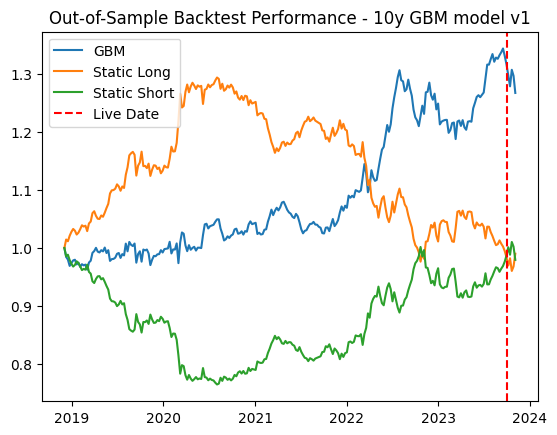

In [163]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(perf_data.index, perf_data['cumulative_ret'], label='GBM')
plt.plot(perf_data.index, perf_data['static_long_ret'], label='Static Long')
plt.plot(perf_data.index, perf_data['static_short_ret'], label='Static Short')
plt.title('Out-of-Sample Backtest Performance - 10y GBM model v1')
# Add a vertical line for the target date
Live_Date = backtest_results_10Y_UST_v1.index.max()
plt.axvline(x=pd.to_datetime(Live_Date), color='red', linestyle='--', label='Live Date')
# Label the line
#plt.text(pd.to_datetime(Live_Date),1.15,'Live Results Begin', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.legend()

In [153]:
cum_ret_gbm = perf_data['cumulative_ret'][-1]
cum_ret_static_long = perf_data['static_long_ret'][-1]
cum_ret_static_short = perf_data['static_short_ret'][-1]

print(f'Out-of-Sample Cumulative Return of GBM: {cum_ret_gbm:.4f}')
print(f'Out-of-Sample Cumulative Return of Static Long: {cum_ret_static_long:.4f}')
print(f'Out-of-Sample Cumulative Return of Static Short: {cum_ret_static_short:.4f}')
import pandas as pd
import numpy as np


returns_df = perf_data.copy()

# Calculate drawdowns
returns_df['Peak'] = returns_df['cumulative_ret'].cummax()
returns_df['Drawdown'] = (returns_df['cumulative_ret'] / returns_df['Peak']) - 1

# # Find drawdowns
# drawdowns = returns_df[returns_df['Drawdown'] < 0]

# Calculate drawdown metrics
# Initialize lists to store drawdown metrics
drawdown_lengths = []
drawdown_depths = []
drawdown_dates = []

current_length = 0
current_depth = 0
current_start_date = None

for date, drawdown in zip(returns_df.index, returns_df['Drawdown']):
    if drawdown < 0:
        current_length += 1
        current_depth = min(current_depth, drawdown)
        if current_start_date is None:
            current_start_date = date
    else:
        if current_length > 0:
            drawdown_lengths.append(current_length)
            drawdown_depths.append(current_depth)
            drawdown_dates.append(current_start_date)
            current_length = 0
            current_depth = 0
            current_start_date = None
    

if current_length > 0:
    drawdown_lengths.append(current_length)
    drawdown_depths.append(current_depth)
    drawdown_dates.append(current_start_date)

# Calculate average length of drawdowns
average_drawdown_length = np.mean(drawdown_lengths)

# Identify the date, length, and depth of the longest drawdown
longest_drawdown_index = np.argmax(drawdown_lengths)
longest_drawdown_date = drawdown_dates[longest_drawdown_index]
longest_drawdown_length = drawdown_lengths[longest_drawdown_index]
longest_drawdown_depth = drawdown_depths[longest_drawdown_index]

print("Average Drawdown Length:", average_drawdown_length, "weeks")
print("Date of the Longest Drawdown:", longest_drawdown_date)
print("Length of the Longest Drawdown:", longest_drawdown_length, "weeks")
print(f"Depth of the Longest Drawdown: {longest_drawdown_depth:.4f}")

# Calculate Sortino ratio
risk_free_rate = 0.00  # replace with the actual risk-free rate
downside_returns = returns_df['trade ret'][returns_df['trade ret'] < 0]
downside_deviation = np.std(downside_returns)

sortino_ratio = (np.mean(returns_df['trade ret']) - risk_free_rate) / downside_deviation
print(f"Sortino Ratio: {sortino_ratio:.4f}")

# Calculate Sharpe ratio
sharpe_ratio = (np.mean(returns_df['trade ret']) - risk_free_rate) / np.std(returns_df['trade ret'])
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Calculate Information Ratio
benchmark_returns = returns_df['ret'] # static long
excess_returns = returns_df['trade ret'] - benchmark_returns
information_ratio = np.mean(excess_returns) / np.std(excess_returns)
print(f"Information Ratio: {information_ratio:.4f}")

Hit_rate = returns_df['trade ret'][returns_df['trade ret'] > 0].count() / returns_df['trade ret'].count()
print(f'Hit Rate: {Hit_rate:.4f}')

subset_df = returns_df[returns_df['Pos'] == -1 ]
subset_df["short_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
cum_ret_shorts = subset_df['short_cum_ret'][-1]
print(f'Cumulative Return of Shorts: {cum_ret_shorts:.4f}')
subset_df2 = returns_df[(returns_df['Pos'] == -1) & (returns_df['trade ret'] > 0)]
short_Hit_rate = subset_df2['Pos'].count() / returns_df['Pos'][returns_df['Pos'] == -1].count()
print(f'Hit Rate of Shorts: {short_Hit_rate:.4f}')


subset_df = returns_df[(returns_df['Pos'] == 1) ]
subset_df["long_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
cum_ret_longs = subset_df['long_cum_ret'][-1]
print(f'Cumulative Return of Longs: {cum_ret_longs:.4f}')
subset_df2 = returns_df[(returns_df['Pos'] == 1) & (returns_df['trade ret'] > 0)]
long_Hit_rate = subset_df2['Pos'].count() / returns_df['Pos'][returns_df['Pos'] == 1].count()
print(f'Hit Rate of Longs: {long_Hit_rate:.4f}')


Out-of-Sample Cumulative Return of GBM: 1.2669
Out-of-Sample Cumulative Return of Static Long: 0.9901
Out-of-Sample Cumulative Return of Static Short: 0.9795
Average Drawdown Length: 11.0 weeks
Date of the Longest Drawdown: 2022-08-07 00:00:00
Length of the Longest Drawdown: 49 weeks
Depth of the Longest Drawdown: -0.0908
Sortino Ratio: 0.1344
Sharpe Ratio: 0.0907
Information Ratio: 0.0653
Hit Rate: 0.5891
Cumulative Return of Shorts: 1.1228
Hit Rate of Shorts: 0.5905
Cumulative Return of Longs: 1.1283
Hit Rate of Longs: 0.5882


C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\3466426242.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["short_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
C:\Users\dstoc\AppData\Local\Temp\ipykernel_15444\3466426242.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["long_cum_ret"] = (subset_df['trade ret'] +1).cumprod()
